
<h1 align="center"><font size="7"><strong>World Happiness Report 2020-2021</strong></font></h1>

------------------------

### **PENDAHULUAN**
The World Happiness Report adalah survei penting mengenai kondisi kebahagiaan global dari tahun 2015 hingga 2019. Laporan ini telah mendapatkan pengakuan global karena pemerintah, organisasi, dan masyarakat sipil semakin banyak menggunakan indikator kebahagiaan untuk menginformasikan keputusan pembuatan kebijakan mereka. Para ahli terkemuka di berbagai bidang ekonomi, psikologi, analisis survei, statistik nasional, kesehatan, kebijakan publik, dan banyak lagi menjelaskan bagaimana pengukuran kesejahteraan dapat digunakan secara efektif untuk menilai kemajuan suatu negara. Laporan ini membahas kondisi Happiness di dunia saat ini dan menunjukkan bagaimana ilmu pengetahuan baru tentang kebahagiaan menjelaskan variasi kebahagiaan secara personal dan nasional.

### **DATASET**
Project ini menggunakan dataset World Happiness Report 2020-2021, yang dapat ditemukan di situs web resmi. Dataset ini berisi 20 kolom dan 301 baris, dengan setiap baris mewakili sebuah negara dan setiap kolom mewakili variabel yang terkait dengan kebahagiaan.

dataset : https://www.kaggle.com/datasets/mathurinache/world-happiness-report/?select=2020.csv

# **A. IMPORT LIBRARY**
---

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import seaborn as sns

# **B. DATA CLEANING**
---

## **- Mengload Dataset**

In [169]:
folder_path = r"F:\Machine Learning\Happiness Index\data"

# Memilih data yang ingin digunakan
selected_files = ["2021.csv", "2020.csv"]

# Menggabungkan dan membaca isi data yang dipilih
df = pd.concat((pd.read_csv(os.path.join(folder_path, file)) for file in selected_files), ignore_index=True)

# Menyimpan hasil gabungan ke file baru
df.to_csv(os.path.join(folder_path, 'merged_file.csv'), index=False)

## **- Melihat Dataset Bagian Atas**

In [170]:
df.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


**Informasi data :**
1. `Country name` : Nama Negara
2. `Regional indicator` : Wilayah tempat Negara berada
3. `Ladder score` : Skor Kebahagiaan untuk Negara
4. `Standard error of ladder score` : Std Err untuk Skor Kebahagiaan
5. `upperwhisker` : nilai tertinggi yang tidak terlalu ekstrem
6. `lowerwhisker` : nilai terendah yang tidak terlalu ekstrem
7. `Logged GDP per capita` : Pendapatan Domestik Bruto (PDB) per kapita yang telah disesuaikan dengan Purchasing Power Parity (PPP) atau daya beli.
8. `Social support` : Dukungan sosial (memiliki seseorang yang dapat diandalkan)
9. `Healthy life expectancy` : Angka Harapan Hidup Sehat (HLE), menggambarkan berapa lama seseorang diharapkan hidup dalam kondisi sehat.
10. `Freedom to make life choices` : Kebebasan untuk menentukan pilihan hidup
11. `Generosity` : Kemurahan hati, tergambar dari pertanyaan GWP "Apakah Anda pernah menyumbangkan uang untuk kegiatan amal dalam satu bulan terakhir?" pada PDB per kapita.
12. `Perceptions of corruption` : Ukurannya rata-rata nasional dari tanggapan survei terhadap dua pertanyaan dalam GWP: "Apakah korupsi tersebar luas di seluruh pemerintahan atau tidak" dan "Apakah korupsi tersebar luas di dunia usaha atau tidak?"
13. `Ladder score in Dystopia` : Skor Kebahagiaan untuk negara fiksi Dystopia. Dystopia digunakan sebagai garis dasar, skor terendah karena memiliki penduduk paling tidak bahagia di dunia.
14. `Explained by: Log GDP per capita` : Perkiraan sejauh mana PDB menjelaskan Skor Kebahagiaan
15. `Explained by: Social support` : Perkiraan sejauh mana dukungan sosial menjelaskan Skor Kebahagiaan
16. `Explained by: Healthy life expectancy` : Perkiraan sejauh mana harapan hidup sehat menjelaskan Skor Kebahagiaan
17. `Explained by: Freedom to make life choices` : Perkiraan sejauh mana Kebebasan untuk membuat pilihan hidup menjelaskan Skor Kebahagiaan
18. `Explained by: Generosity` : Perkiraan sejauh mana Kedermawanan menjelaskan Skor Kebahagiaan
19. `Explained by: Perceptions of corruptio` : Perkiraan sejauh mana Persepsi tentang korupsi menjelaskan Skor Kebahagiaan
20. `Dystopia + residual` : Perkiraan sejauh mana semua variabel lain gagal menjelaskan Skor Kebahagiaan


## **- Mendrop Colum yang Tidak Diperlukan.**

In [171]:
#mendrop colum
df.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Explained by: Log GDP per capita',
         'Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices',
         'Explained by: Generosity','Explained by: Perceptions of corruption'],axis=1, inplace=True)

## **- Mengecek Apakah Terdapat Missing Value atau Duplicate Data**

In [172]:
#Melihat apakah terdapat missing value
df.isnull().values.any()

False

In [173]:
df.duplicated().sum()

0

Data **tidak terdapat** missing value dan duplicate data

## **- Melihat Informasi Column**

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  302 non-null    object 
 1   Regional indicator            302 non-null    object 
 2   Ladder score                  302 non-null    float64
 3   Logged GDP per capita         302 non-null    float64
 4   Social support                302 non-null    float64
 5   Healthy life expectancy       302 non-null    float64
 6   Freedom to make life choices  302 non-null    float64
 7   Generosity                    302 non-null    float64
 8   Perceptions of corruption     302 non-null    float64
 9   Ladder score in Dystopia      302 non-null    float64
 10  Dystopia + residual           302 non-null    float64
dtypes: float64(9), object(2)
memory usage: 26.1+ KB


Pada df terdapat 11 columns dan 302 baris, dengan typedata object dan float

## **- Melihat Banyak Unique pada Setiap Column**

In [175]:
df.nunique()

Country name                    154
Regional indicator               10
Ladder score                    300
Logged GDP per capita           300
Social support                  272
Healthy life expectancy         285
Freedom to make life choices    279
Generosity                      283
Perceptions of corruption       283
Ladder score in Dystopia          2
Dystopia + residual             295
dtype: int64

# __C. EXPLORATORY DATA ANALYSIS (EDA)__
---




## **- Descriptive Statistics**

In [176]:
df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,5.502645,9.363053,0.811693,64.715540,0.787424,-0.014848,0.730322,2.198127,2.198290
std,1.092111,1.180595,0.118102,6.907445,0.115492,0.150990,0.176912,0.229201,0.595958
min,2.523000,6.492642,0.319460,45.200001,0.382000,-0.300907,0.082000,1.972317,0.257241
25%,4.769400,8.483295,0.743481,59.302750,0.717000,-0.126761,0.675250,1.972317,1.823000
50%,5.524500,9.514612,0.831538,66.442253,0.800821,-0.035000,0.782061,1.972317,2.223108
75%,6.248375,10.356000,0.905750,69.568500,0.877532,0.082000,0.847724,2.430000,2.619750
max,7.842000,11.647000,0.983000,76.953000,0.974998,0.560664,0.939000,2.430000,3.482000


Diperoleh bahwa:
- Rata rata **Ladder Score** atau heppiness score in the world pada tahun 2020- 2021 adalah __5.5__
- **GDP** atau Pendapatan Domestik Bruto paling **rendah** yang diperoleh suatu negara yaitu sebesar __6.49__
- **Healthy life expectancy** atau Angka Harapan Hidup Sehat memiliki nilai rata-rata yang cukup tinggi yaitu __64.7__

## **- Melihat Distribusi Data**

In [177]:
feature = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
            'Freedom to make life choices','Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia',
            'Dystopia + residual']

C:\Users\AYYU\AppData\Local\Temp\ipykernel_12196\977118261.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\AYYU\AppData\Local\Temp\ipykernel_12196\977118261.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\AYYU\AppData\Local\Temp\ipykernel_12196\977118261.py:6: UserWarning:



`distplot` is a dep

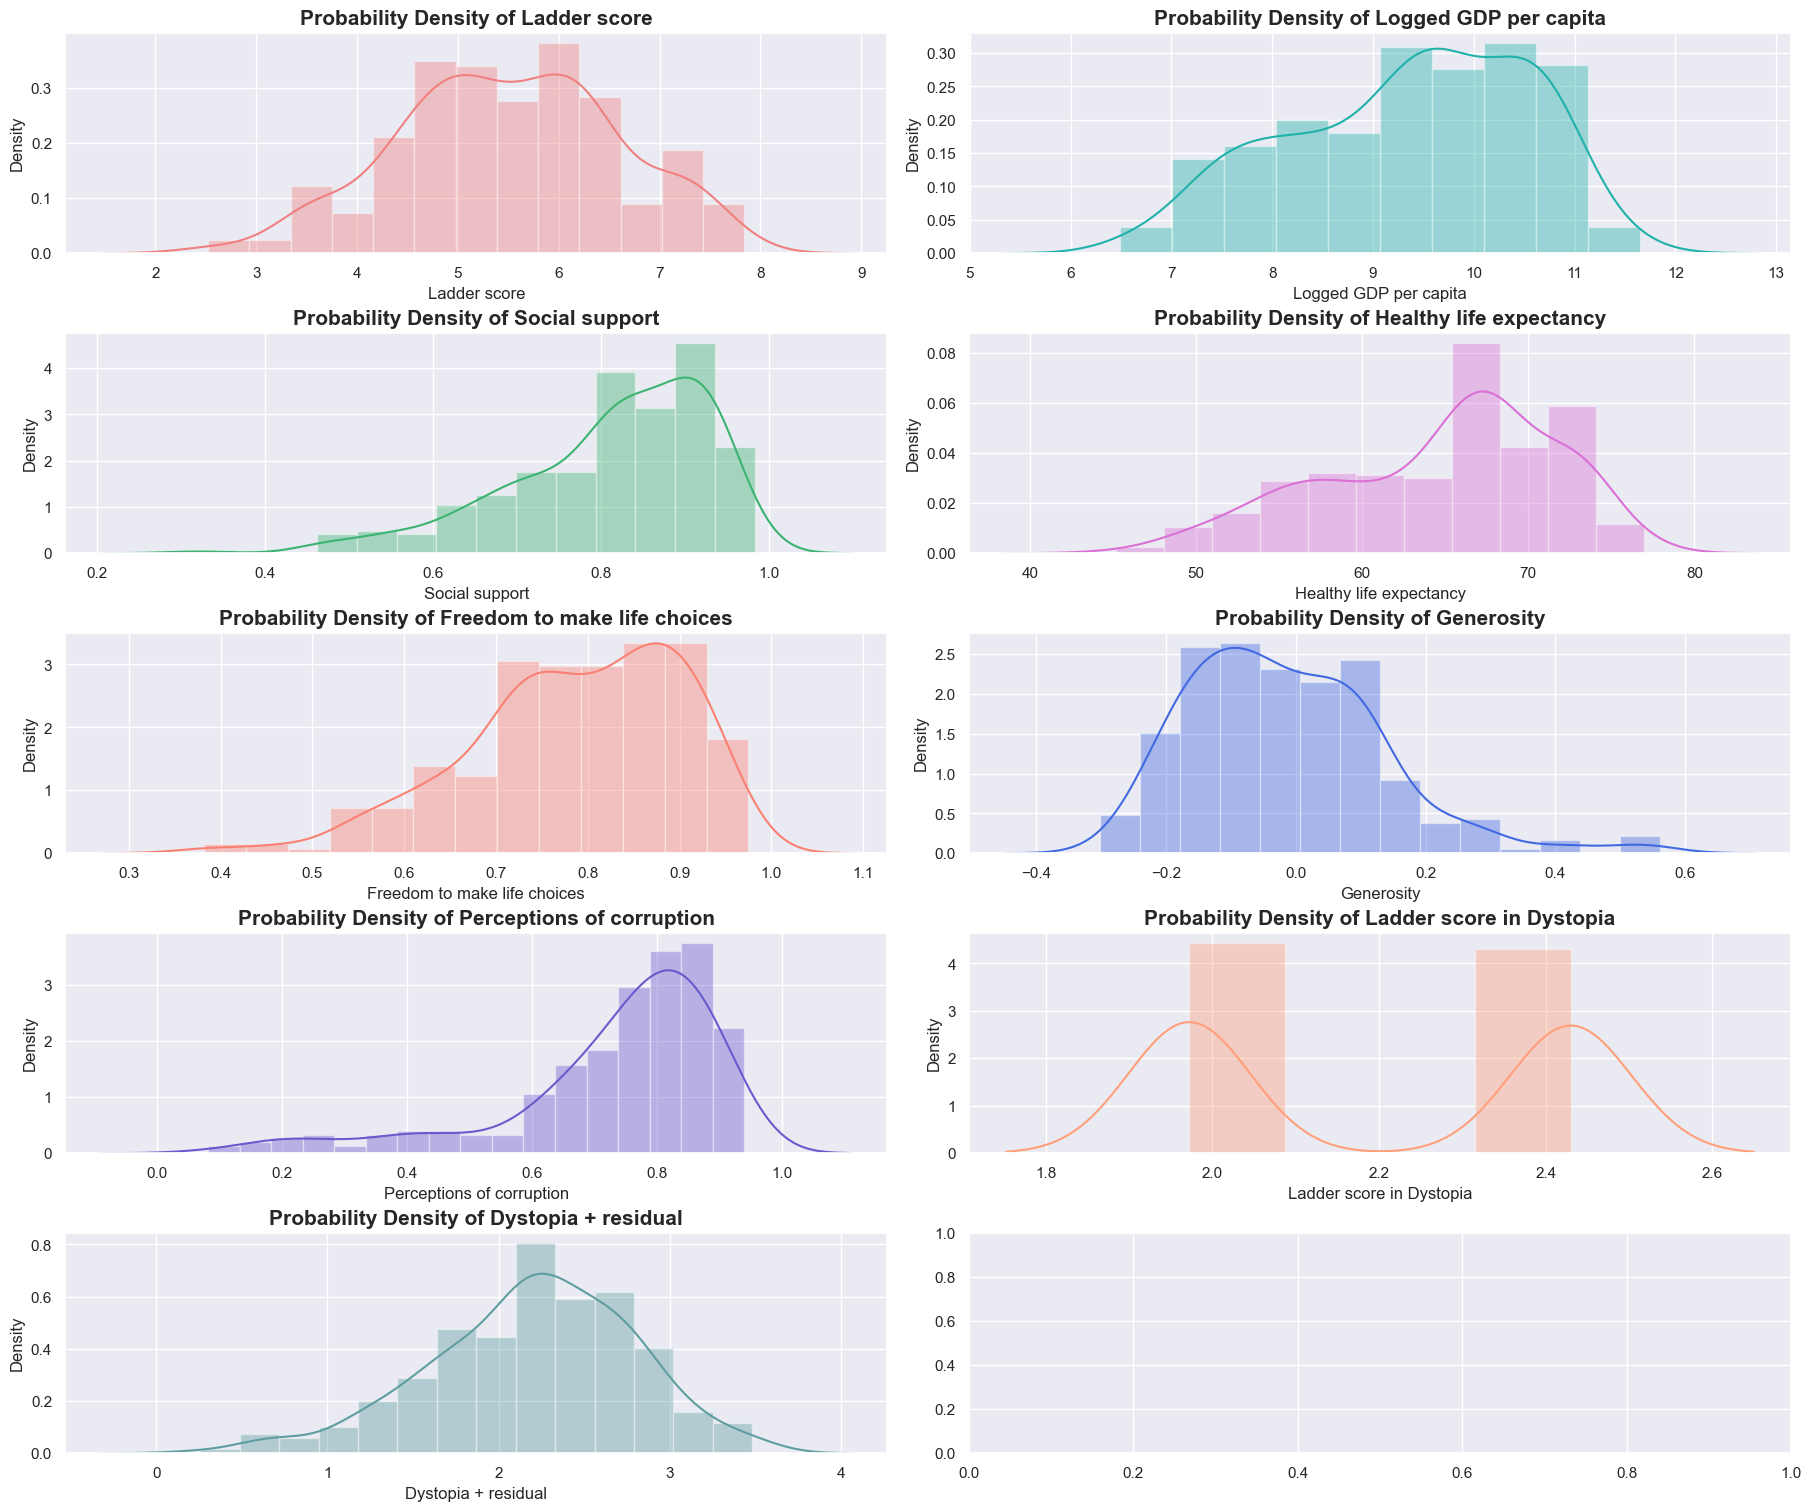

In [178]:
fig, ax = plt.subplots(5, 2, figsize=(18, 15), constrained_layout=True)

for i, feature in enumerate(feature):
    row = i // 2
    col = i % 2
    sns.distplot(df[feature], ax=ax[row, col], color='lightcoral' if i == 0 else 'lightseagreen' if i == 1 else 'mediumseagreen' if i == 2 else 'orchid' if i == 3 else 'salmon' if i == 4 else 'royalblue' if i == 5 else 'slateblue' if i == 6 else 'lightsalmon' if i == 7 else 'cadetblue')
    ax[row, col].set_title(f"Probability Density of {feature}", fontsize=15, fontweight='bold')

plt.show()


**Kesimpulan:** <br>
Berdasarkan visualisasi diatas, dapat disimpulkan bahwa semua variabel numeric memiliki __distribusi tidak normal__.

## **- Correlation Matriks**

In [179]:
Correlation_matriks = df.drop(columns=['Country name', 'Regional indicator']).corr()

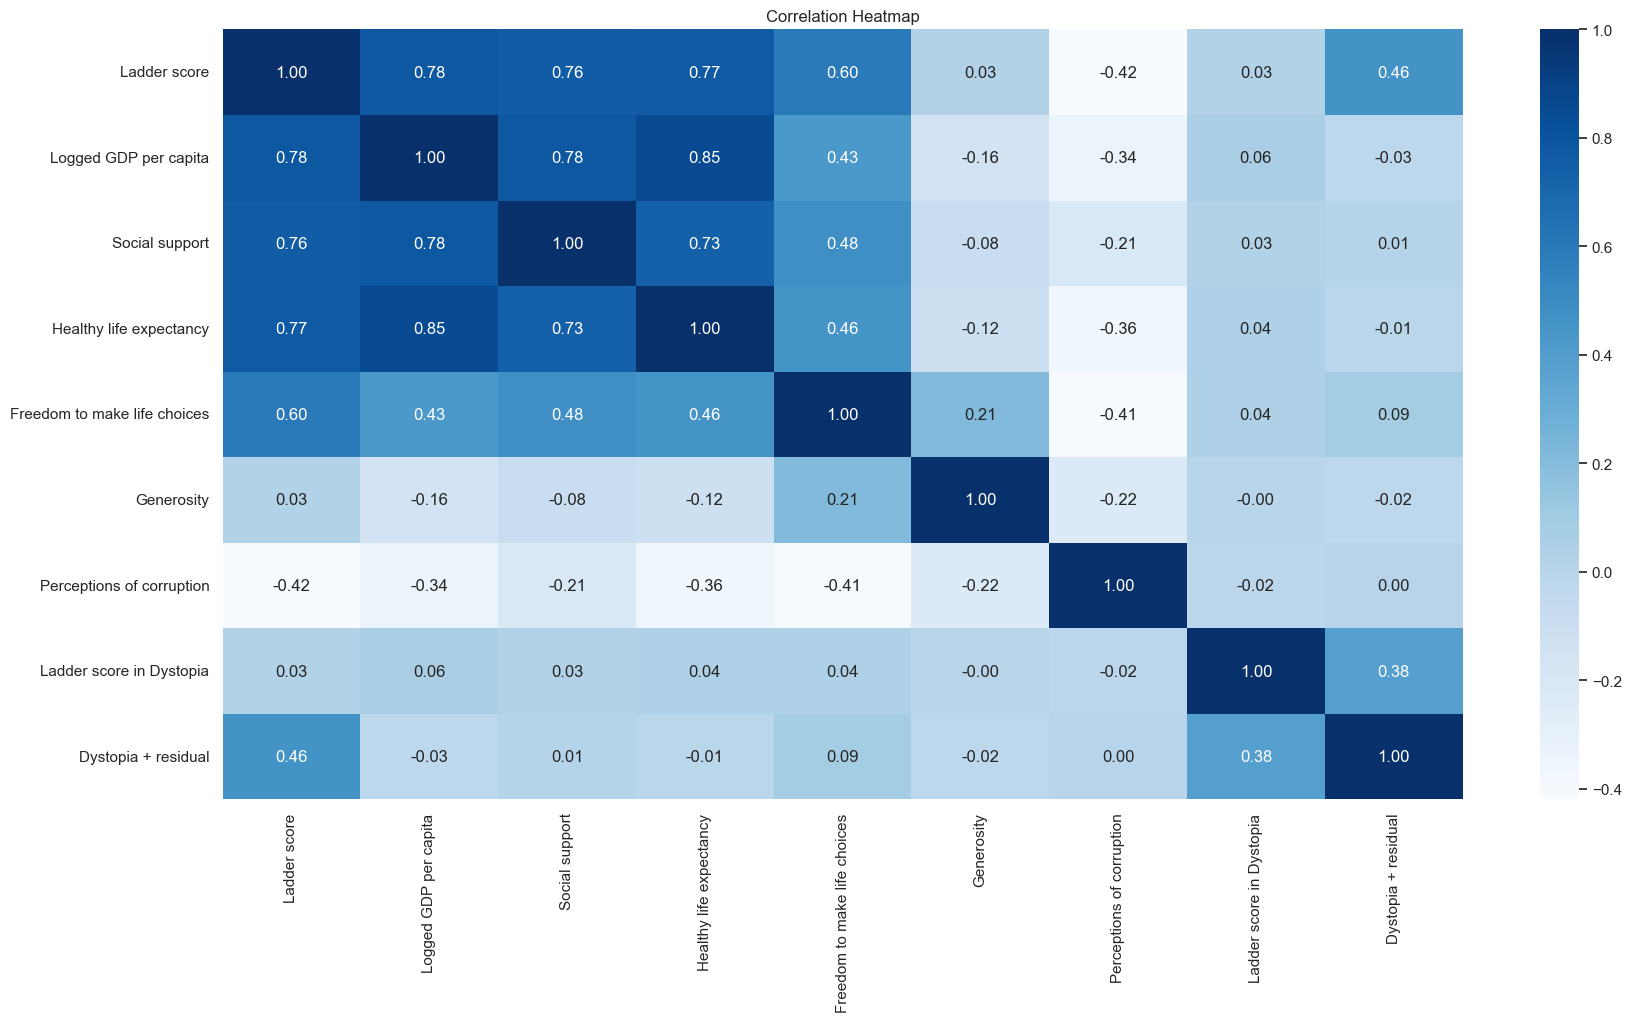

In [180]:
# Menggunakan heatmap untuk visualisasi korelasi
plt.figure(figsize=(20, 10))
sns.heatmap(Correlation_matriks, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [181]:
Correlation_matriks.corr()[['Ladder score']].sort_values(by='Ladder score', ascending=False)

,Ladder score
Ladder score,1.000000
Healthy life expectancy,0.910928
Logged GDP per capita,0.904924
Social support,0.894664
Freedom to make life choices,0.791988
Dystopia + residual,0.089899
Generosity,-0.213348
Ladder score in Dystopia,-0.270220
Perceptions of corruption,-0.817970


Berdasarkan visualisasi heatmap diatas, terdapat beberapa kolom yang memiliki korelasi cukup tinggi dengan kolom 
`Ladder score`. Kolom tersebut diantaranya adalah sebagai 
berikut:
1. `Healthy life expectancy	`, dengan korelasi sebesar 0.91
2. `Logged GDP per capita`, dengan korelasi sebesar 0.90
3. `Social support	`, dengan korelasi sebesar 0.89
4. `Freedom to make life choices`, dengan korelasi sebesar 0.79
5. `Perceptions of corruption`, dengan korelasi sebesar -0.817

## **- Ladder Score by Country and Ragional**
### a. Country

In [182]:
# Menghitung rata-rata 'Ladder score' untuk setiap 'Regional indicator'
AverageLadderscoreCN = df.groupby('Country name')['Ladder score'].mean().sort_values(ascending=False)

In [183]:
#Melihat 10 negara teratas dengan "Ladder score" paling tinggi
AverageLadderscoreCN.head(10)

Country name
Finland        7.82535
Denmark        7.63280
Switzerland    7.56545
Iceland        7.52925
Netherlands    7.45645
Norway         7.44000
Sweden         7.35825
New Zealand    7.28830
Austria        7.28110
Luxembourg     7.28075
Name: Ladder score, dtype: float64

In [184]:
AverageLadderscoreCN.tail(10)

Country name
Yemen                       3.59270
Lesotho                     3.58240
Malawi                      3.56900
Tanzania                    3.54960
Central African Republic    3.47590
Botswana                    3.47295
Rwanda                      3.36365
Zimbabwe                    3.22210
South Sudan                 2.81660
Afghanistan                 2.54495
Name: Ladder score, dtype: float64

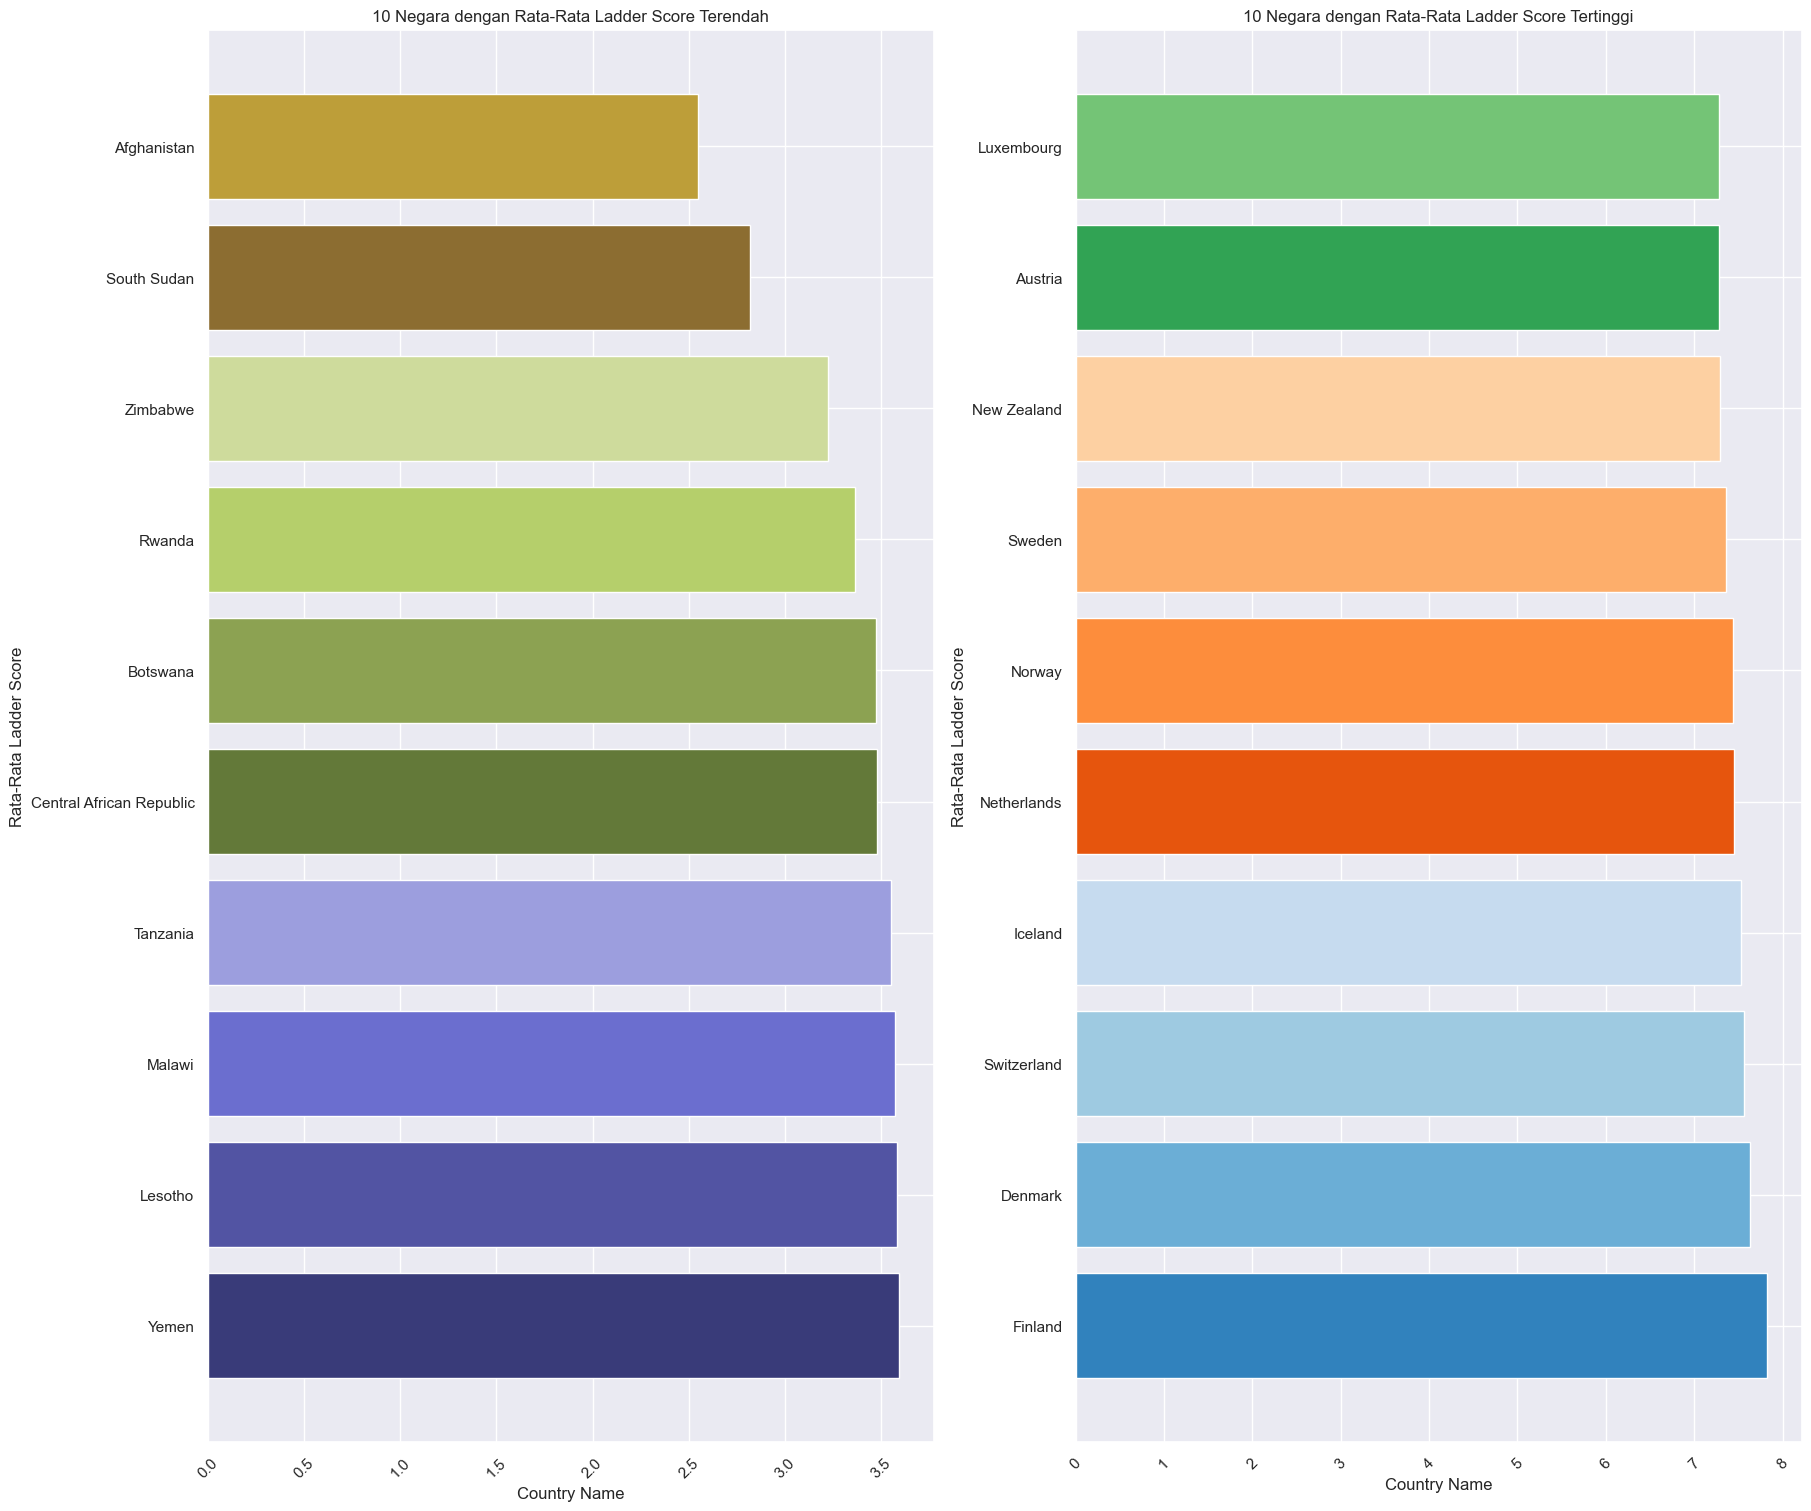

In [211]:
# Membuat figure dan axes dengan subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 15), constrained_layout=True)

# Bar plot untuk 10 negara dengan skor terendah
ax[0].barh(AverageLadderscoreCN.tail(10).index, AverageLadderscoreCN.tail(10).values, color=plt.cm.tab20b.colors)
ax[0].set_title('10 Negara dengan Rata-Rata Ladder Score Terendah')
ax[0].set_xlabel('Country Name')
ax[0].set_ylabel('Rata-Rata Ladder Score')
ax[0].tick_params(axis='x', rotation=45)

# Bar plot untuk 10 negara dengan skor tertinggi
ax[1].barh(AverageLadderscoreCN.head(10).index, AverageLadderscoreCN.head(10).values, color=plt.cm.tab20c.colors)
ax[1].set_title('10 Negara dengan Rata-Rata Ladder Score Tertinggi')
ax[1].set_xlabel('Country Name')
ax[1].set_ylabel('Rata-Rata Ladder Score')
ax[1].tick_params(axis='x', rotation=45)

# Menampilkan plot
plt.show()

### b. Regional

In [220]:
# Menghitung rata-rata 'Ladder score' untuk setiap 'Regional indicator'
AverageLadderscore = df.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False)
AverageLadderscore

Regional indicator
North America and ANZ                 7.151012
Western Europe                        6.907062
Latin America and Caribbean           5.945817
Central and Eastern Europe            5.934291
East Asia                             5.762592
Commonwealth of Independent States    5.412671
Southeast Asia                        5.395461
Middle East and North Africa          5.223462
South Asia                            4.458650
Sub-Saharan Africa                    4.436764
Name: Ladder score, dtype: float64

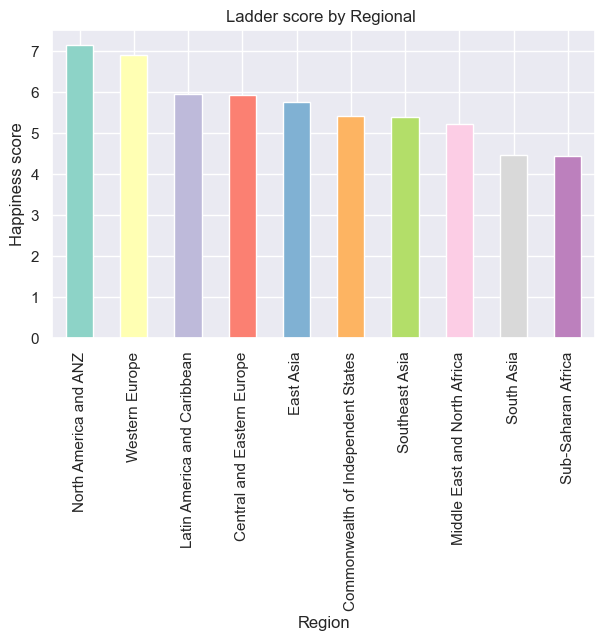

In [218]:
AverageLadderscore.plot(kind='bar',color = plt.cm. Set3.colors, figsize=(7,4))
plt.title("Ladder score by Regional ")
plt.xlabel("Region")
plt.ylabel("Happiness score") 
plt.show()

**Kesimpulan :**
1. Terdapat 10 negara dengan `Ladder score` **paling tinggi**, yaitu Finland, Denmark, Switzerland, Iceland, Netherlands, 
Norway, Sweden, New Zealand, Austria, dan Luxembourg
2. Regional yang memiliki rata-rata `Ladder score` tertinggi terdapat pada region North America and ANZ dan Western Europev
3. Terdapat 10 negara dengan `Ladder score` **paling rendah** yaitu, Yemen, Lesotho, Malawi, Tanzania, Central African Republic, Botswana, Rwanda, Zimbabwe, South Sudan, dan Afghanistan 
4. Regional yang memiliki rata-rata `Ladder score` tertendah terdapat pada region South Asia dan Sub-Saharan Africa.

## **- Logged GDP per Capit by Regional**
Melihat rata-rata GDP pada setiap regional

In [202]:
regionbyreg= df.groupby('Regional indicator')['Logged GDP per capita'].mean()

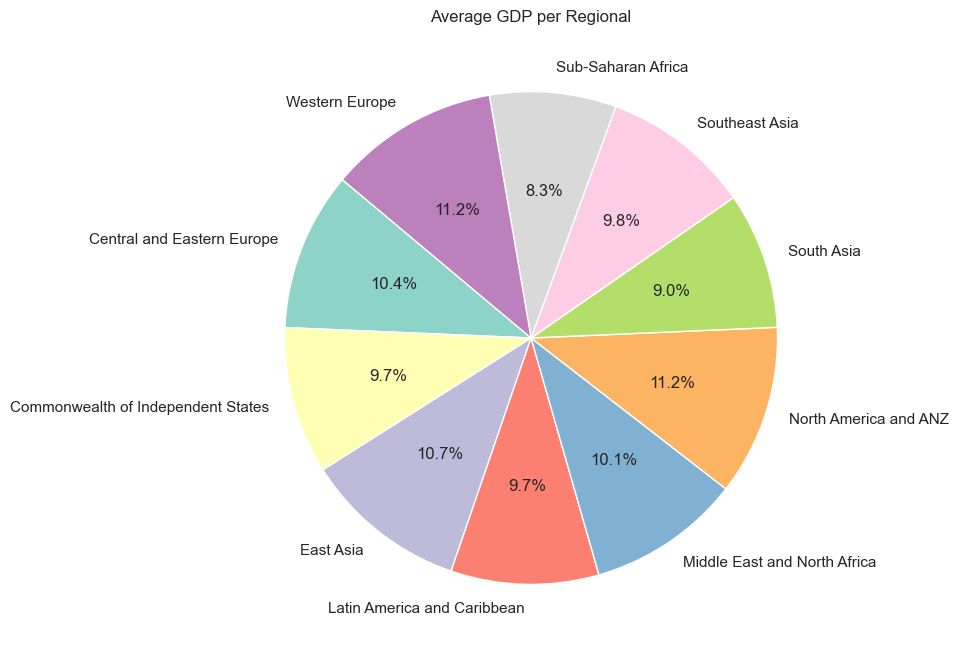

In [221]:
# Membuat pie chart
plt.figure(figsize=(10, 8))
plt.pie(regionbyreg, labels=regionbyreg.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=140)

# Menambahkan judul
plt.title('Average GDP per Regional')

# Menampilkan plot
plt.show()

**Kesimpulan :**<br>
Region dengan rata-rata `GDP` __paling tinggi__ didunia terletak pada __North America and ANZ dan Western Europe__, yaitu memiliki GDP sebesar 11,2% dari total GDP dunia. Dan __Sub-Saharan Africa__ memiliki rata-rata `GDB` yang paling rendah, yaitu sebesar 8,3% dari total GDP dunia


## **- Correlation Logged GDP per Capita and Healthy Life Expectancy**

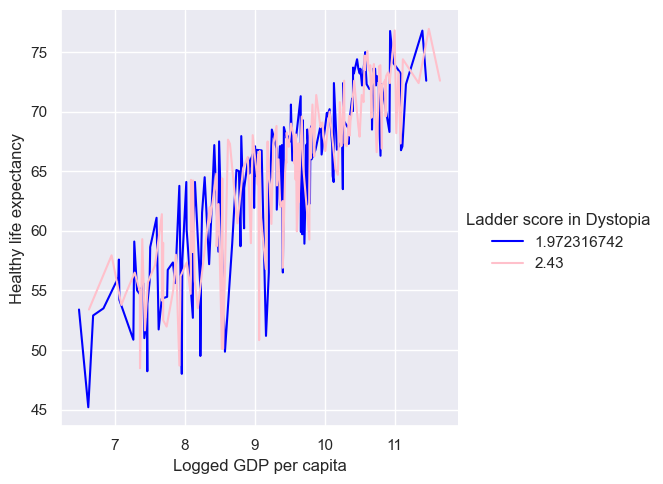

In [189]:
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(kind='line',
            x='Logged GDP per capita',
            y='Healthy life expectancy',
            data= df,
            hue='Ladder score in Dystopia',
            palette = ['blue','pink'])

**Kesimpulan**<br>
Berdasarkan diagram diatas, Logged GDP per capita berkorelasi positif dengan Healthy life expectancy, artinya semakin naik angka GDP maka semakin naik juga Angka Harapan Hidup Sehat. Namun tidak mempengaruhi Leadder score in Dystopia.

## **- Correlation with Happiness Score by Region**

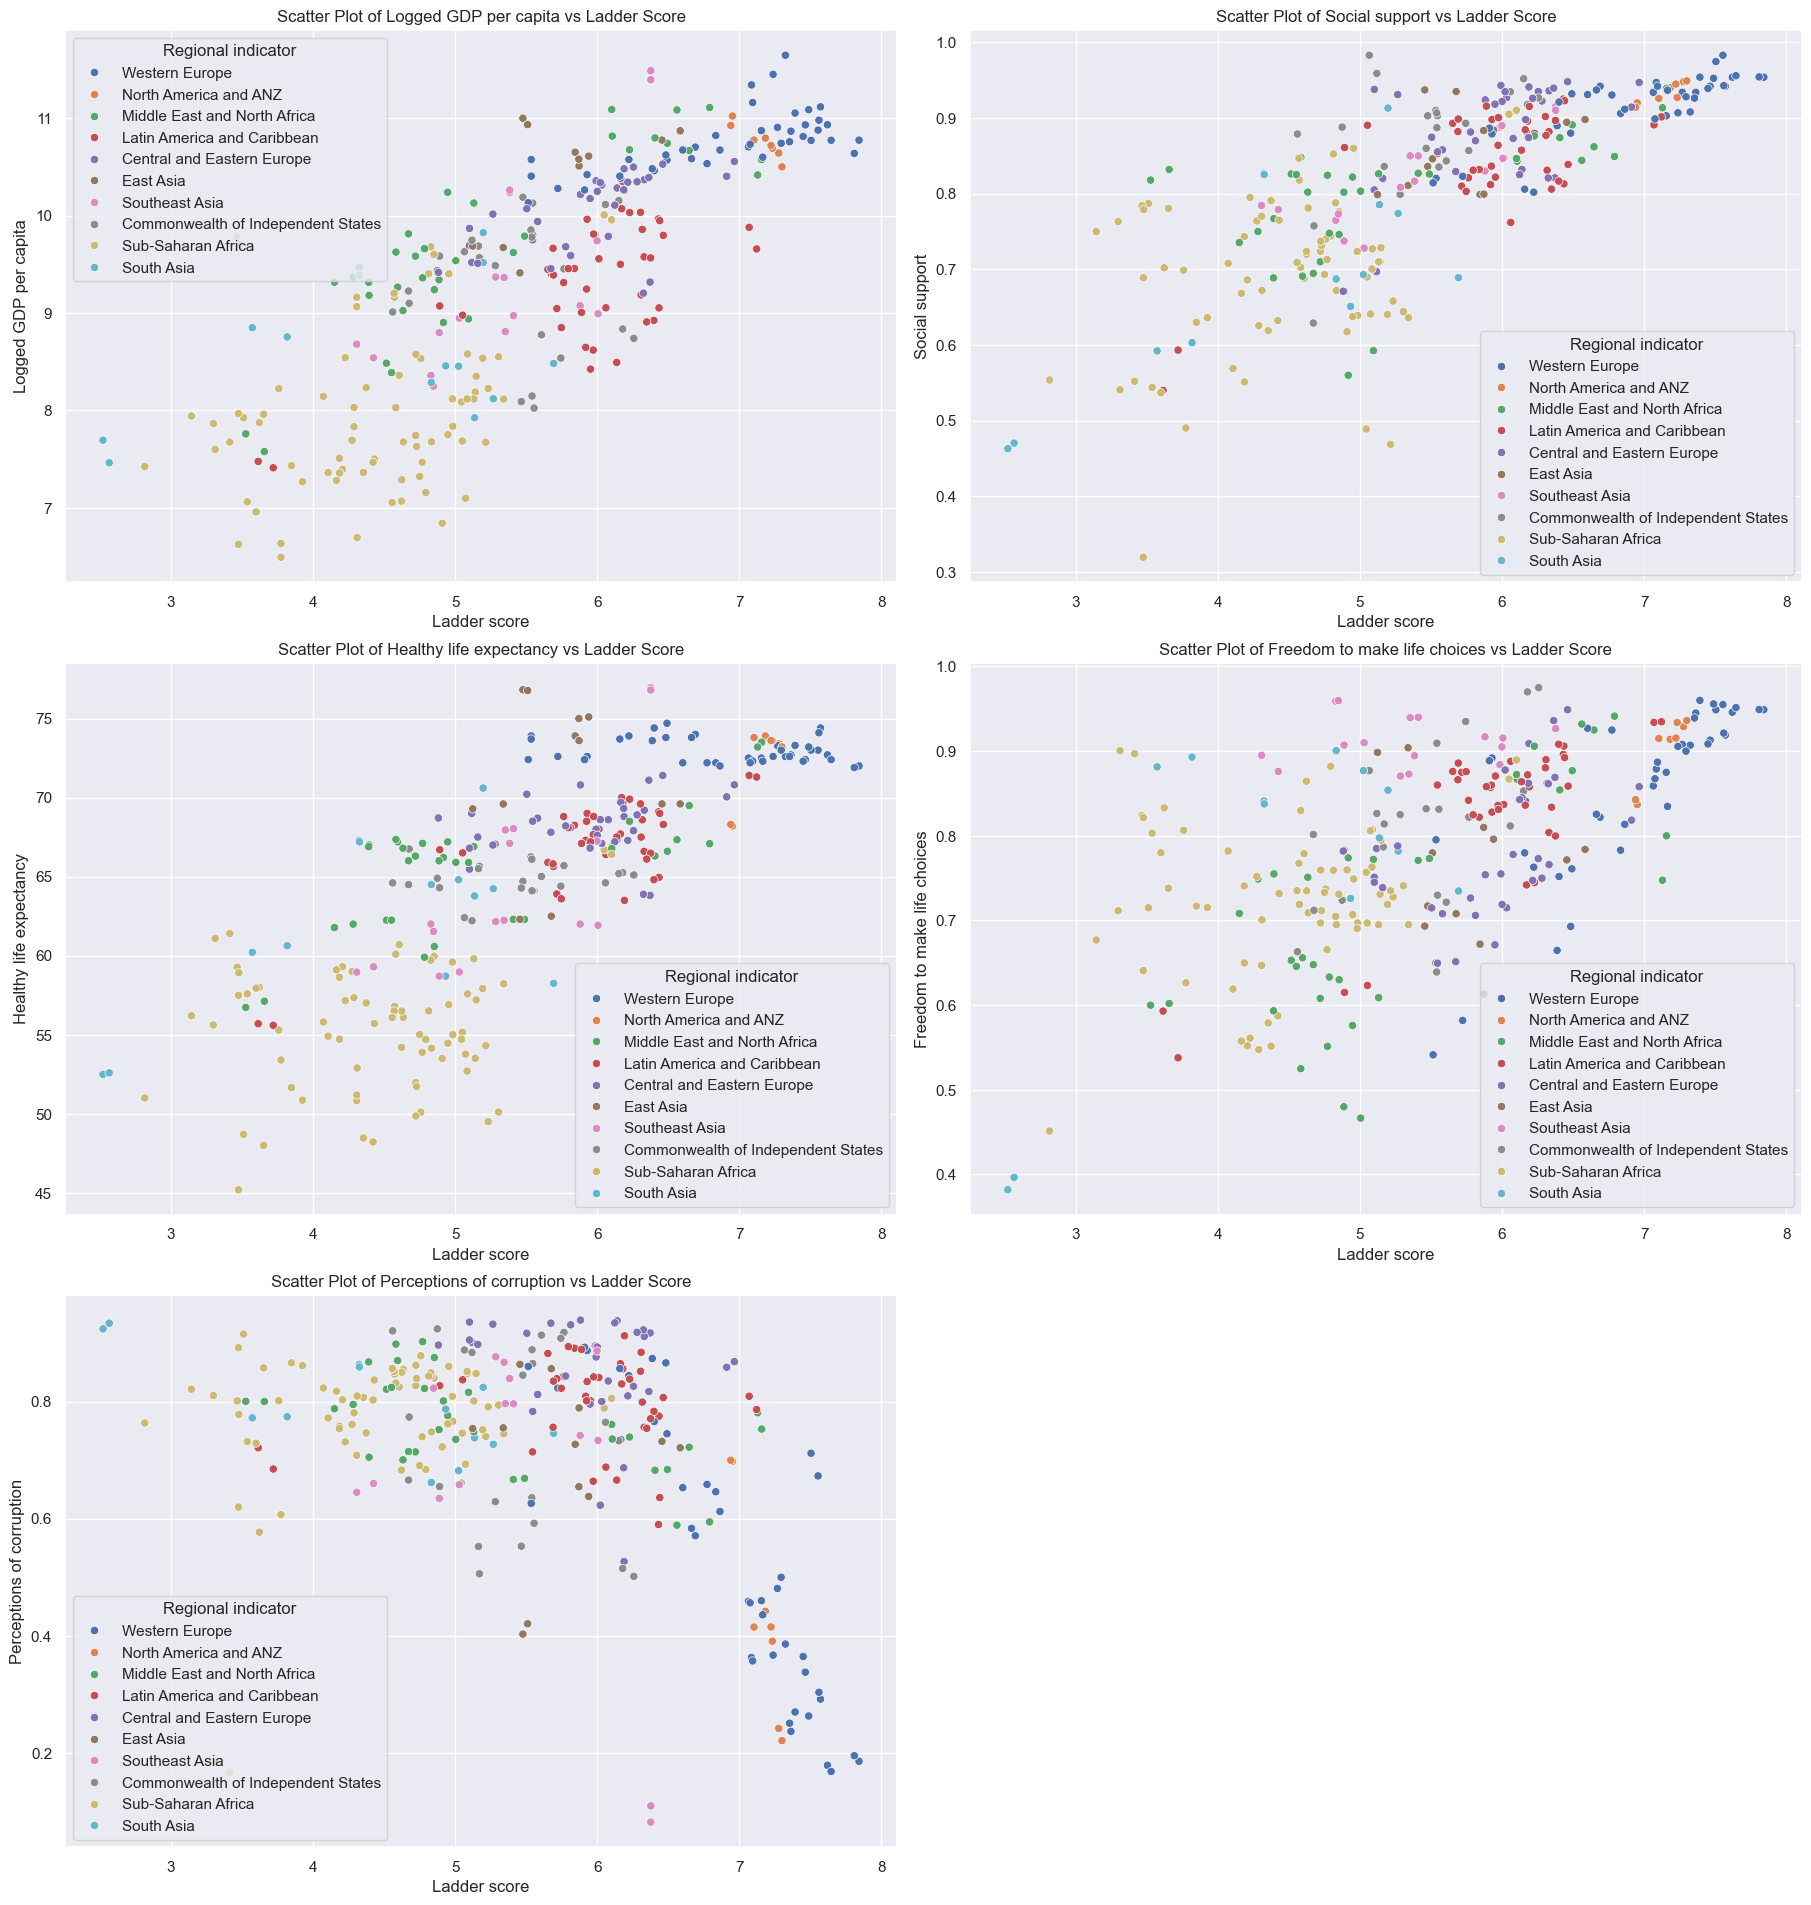

In [210]:
# Mendefinisikan fitur yang ingin diplot
vit= ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Perceptions of corruption']

# Membuat figure dan axes dengan subplots
fig, ax = plt.subplots(5, 2, figsize=(18, 30), constrained_layout=True)

# Menggunakan loop untuk mengisi setiap subplot dengan scatter plot
for i, feature in enumerate(vit):
    # Menentukan posisi subplot saat ini
    row = i // 2  # Pembagian integer untuk mendapatkan nomor baris
    col = i % 2   # Modulo untuk mendapatkan nomor kolom
    
    # Membuat scatter plot pada subplot yang sesuai
    sns.scatterplot(data=df, x='Ladder score', y=feature, hue='Regional indicator', ax=ax[row, col])
    
    # Menambahkan judul
    ax[row, col].set_title(f'Scatter Plot of {feature} vs Ladder Score')

# Jika jumlah fitur kurang dari jumlah subplot, sembunyikan subplot yang tidak digunakan
for j in range(i + 1, 10):
    fig.delaxes(ax[j // 2, j % 2])

# Menampilkan plot
plt.show()

**Kesimpulan :**<br>
1. Tingkat kebahagian pada regional **Western Europev** memiliki angka yang **sangat tinggi** karena region ini memiliki Pendapatan Domestik Bruto yang tinggi, angka social support yang tinggi, angka Harapan Hidup Sehat yang tinggi, memiliki Kebabasan berpendapat yang besar, dan memiliki kasus korupsi yang rendah. 
2. Sedangkan, pada regional **Sub-Saharan African** memiliki angka yang **sangat rendah** karena pada region ini memiliki Pendapatan Domestik Bruto yang rendah, angka social support yang rendah, angka Harapan Hidup Sehat yang rendah, 
memiliki Kebabasan berpendapat yang kurang, dan memiliki kasus korupsi yang tinggi. 

# **D. INSIGHT**
---
1. Rata rata **Ladder Score** atau heppiness score in the world pada tahun 2020- 2021 adalah __5.5__.
2. **GDP** atau Pendapatan Domestik Bruto paling **rendah** yang diperoleh suatu negara yaitu sebesar __6.49__
3. **Healthy life expectancy** atau Angka Harapan Hidup Sehat memiliki nilai rata-rata yang cukup tinggi yaitu __64.7__
4. Tingkat Kebahagian dipengaruhi oleh <br> - Pendapaatan Domestik Bruto <br> - Social Support <br> - Angka Harapan Hidup Sehat <br> - Kebebasan Berpendapat disuatu negara<br> - Kasus Korupsi.
5. 10 negara dengan `Ladder score` **paling tinggi**, yaitu Finland, Denmark, Switzerland, Iceland, Netherlands, 
Norway, Sweden, New Zealand, Austria, dan Luxembourg. Dan 10 negara dengan `Ladder score` **paling rendah** yaitu, Yemen, Lesotho, Malawi, Tanzania, Central African Republic, Botswana, Rwanda, Zimbabwe, South Sudan, dan Afghanistan 
6. Regional yang memiliki rata-rata `Ladder score` __tertinggi__ terdapat pada region North America and ANZ dan Western Europev, sedangkan regional yang memiliki rata-rata `Ladder score` __terendah__ terdapat pada region South Asia dan Sub-Saharan Africa.
7. Region dengan rata-rata `GDP` __paling tinggi__ didunia terletak pada __North America and ANZ dan Western Europe__, yaitu memiliki GDP sebesar 11,2% dari total GDP dunia. Dan __Sub-Saharan Africa__ memiliki rata-rata `GDB` yang paling rendah, yaitu sebesar 8,3% dari total GDP dunia
8. Berdasarkan diagram diatas, Logged GDP per capita berkorelasi positif dengan Healthy life expectancy, artinya semakin naik angka GDP maka semakin naik juga Angka Harapan Hidup Sehat. Namun tidak mempengaruhi Leadder score in Dystopia.
9. Tingkat kebahagian pada regional **Western Europev** memiliki angka yang **sangat tinggi** karena region ini memiliki Pendapatan Domestik Bruto yang tinggi, angka social support yang tinggi, angka Harapan Hidup Sehat yang tinggi, memiliki Kebabasan berpendapat yang besar, dan memiliki kasus korupsi yang rendah. 
10. Sedangkan, pada regional **Sub-Saharan African** memiliki angka yang **sangat rendah** karena pada region ini memiliki 
Pendapatan Domestik Bruto yang rendah, angka social support yang rendah, angka Harapan Hidup Sehat yang rendah, 
memiliki Kebabasan berpendapat yang kurang, dan memiliki kasus korupsi yang tinggi. 
